# Exercise - KNeighborsRegressor - Bike Sharing

### Introducing the exercise

This exercise uses the **bike sharing** dataset. The function of all features as well as the target is described in the **Readme.txt** file. The goal is to predict the count of total rental bikes using KNN's regressor and the OLS linear regression implemented in sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression

The code implemented below reads the **day.csv** file located in the **bike-sharing-dataset** folder and stores the data in a **pandas** DataFrame. Some of the columns are omitted. The goal of predicting the count can be achieved by following the steps below.

* One of the OLS assumptions is that each feature bears a linear dependency with the target. To check whether this condition is satisfied, create separate plots of **cnt** versus each of the six features. Choose two that bear a linear, or close to linear, dependency with the target.
* Let these two features be the inputs and **cnt** be the target.
* Create an 80:20 train-test split.
* Having the features scaled is an essential part of working with the KNN algorithm. Make sure that the two features are scaled properly. You can use sklearn's StandardScaler() class.
* Create instances of the KNeighborsRegressor and LinearRegression classes. For the KNeighborsRegressor model, try to find the number of neighbors that works best.
* Fit the model to the training data.
* Make predictions on the test data.
* For each of the models, make a plot of the true test values versus the predicted test values. A perfect model would draw a 45-degree line. On both figures, plot a 45-degree line for a reference.
* Return the R-squared value for both models. You can find out how to do that on the pages of the two regression algorithms. What is the R-squared value of a perfect model? Based on that, which of the two models performed better?

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler

Try to solve the exercise as best as you can. If you experience trouble completing the any of the tasks or you simply want to check your solution, then refer to the **KNeighborsRegressor-Bike-solution.ipynb** notebook where you will find a sample solution.

Have fun!

### Import the relevant libraries

In [98]:
import pandas as pd
# This method will help us split the data into training and testing datasets
from sklearn.model_selection import train_test_split,GridSearchCV

# This class will help us create a KNN regression model
from sklearn.neighbors import KNeighborsRegressor

# This class will help us create a Linear regression model
from sklearn.linear_model import LinearRegression

# This method will help us calculate the mean squared error for each model
from sklearn.metrics import mean_squared_error

# This library will help us organize our data
import pandas as pd

# We import the sine function which will help us generate our non-linear data
from math import sin

# Import the numpy library
import numpy as np

# These libraries will help us visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### Load the dataset and displaying the inputs

In [3]:
data = pd.read_csv('bike-sharing-dataset\\day.csv').drop(['instant', 
                                                          'dteday', 
                                                          'season', 
                                                          'yr', 
                                                          'mnth', 
                                                          'holiday', 
                                                          'weekday', 
                                                          'weathersit', 
                                                          'workingday'], axis = 1)

In [4]:
data

,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.344167,0.363625,0.805833,0.160446,331,654,985
1,0.363478,0.353739,0.696087,0.248539,131,670,801
2,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...
726,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Your turn :)

# Create a scatter plot for inputs

Text(0, 0.5, 'cnt')

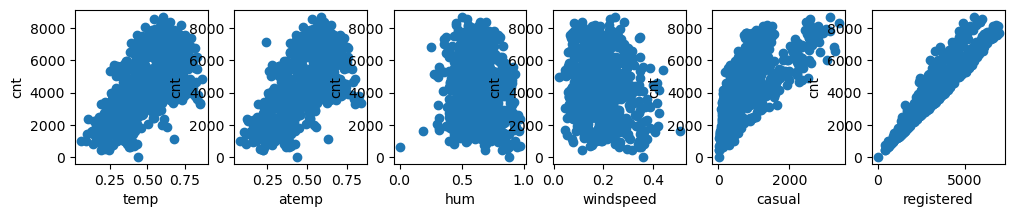

In [31]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6)=plt.subplots(1,6,figsize=(12,2))

ax1.scatter(data[["temp"]],data[["cnt"]])
ax1.set_xlabel("temp")
ax1.set_ylabel("cnt")


ax2.scatter(data[["atemp"]],data[["cnt"]])
ax2.set_xlabel("atemp")
ax2.set_ylabel("cnt")


ax3.scatter(data[["hum"]],data[["cnt"]])
ax3.set_xlabel("hum")
ax3.set_ylabel("cnt")


ax4.scatter(data[["windspeed"]],data[["cnt"]])
ax4.set_xlabel("windspeed")
ax4.set_ylabel("cnt")


ax5.scatter(data[["casual"]],data[["cnt"]])
ax5.set_xlabel("casual")
ax5.set_ylabel("cnt")



ax6.scatter(data[["registered"]],data[["cnt"]])
ax6.set_xlabel("registered")
ax6.set_ylabel("cnt")


In [78]:
inputs=data[["casual","registered"]]


inputs.shape
len(inputs)

731

In [79]:
target=data["cnt"]

In [75]:
len(target)

731

# train,test split

In [82]:
x_train,x_test,y_train,y_test= train_test_split(inputs,target,test_size=0.2,random_state=365)

# scaling

In [122]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)




# Linear Regression

In [117]:
lin=LinearRegression()
lin=lin.fit(x_train_scaled,y_train)

In [118]:
y_test_pred=lin.predict(x_test_scaled)


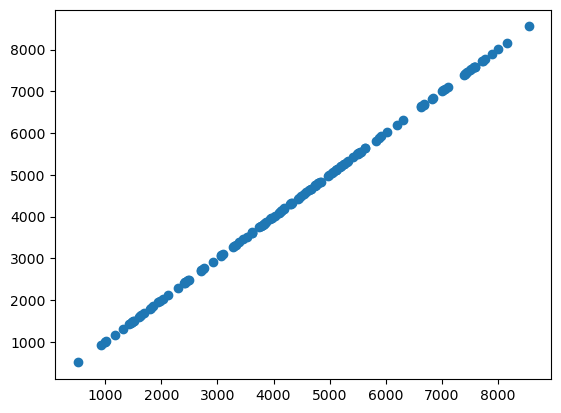

In [91]:
plt.scatter(y_test,y_test_pred)

# KneighborsRegressor

In [136]:
knn=KNeighborsRegressor()

In [124]:
parameters={"n_neighbors":range(1,61),"weights":["uniform","distance"]}


In [125]:
grid_search=GridSearchCV(estimator=knn,param_grid=parameters,scoring="accuracy")

In [126]:
grid_search.fit(x_train_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 93, in _check_targets
    raise 

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 61),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [104]:
grid_search.best_score_

0.003433539640436192

In [127]:
grid_search.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [137]:
knn=KNeighborsRegressor(n_neighbors=2)

In [138]:
knn.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=2)

In [139]:
y_test_pred=knn.predict(x_test_scaled)

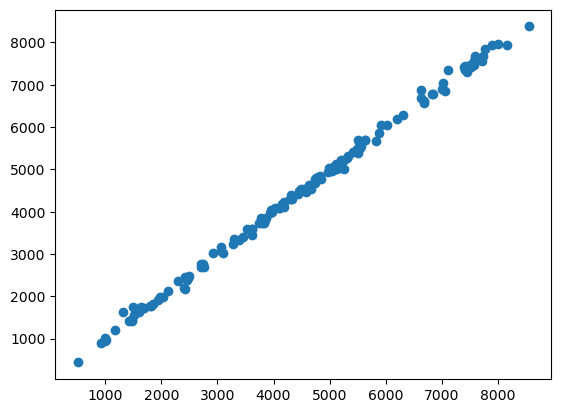

In [140]:
plt.scatter(y_test,y_test_pred)

In [141]:
knn.score(x_test_scaled,y_test)

0.9979433147107003

In [142]:
lin.score(x_test_scaled,y_test)

1.0